In [1]:
#from datasets import load_dataset
import pandas as pd
import sys
import os

### Read the csv file

In [58]:
dir = r'C:\Users\ngoth\OneDrive - flsouthern.edu\Research\AI4AD_Speech\TAUKADIAL\TAUKADIAL-24-train\TAUKADIAL-24\train'
filename = os.path.join(dir, 'groundtruth.csv')
test_dir = r'C:\Users\ngoth\OneDrive - flsouthern.edu\Research\AI4AD_Speech\TAUKADIAL\TAUKADIAL-24-test\TAUKADIAL-24\test'
test_filename = os.path.join(test_dir, 'testgroundtruth.csv')

In [59]:
df = pd.read_csv(filename)
df.head()

,tkdname,age,sex,mmse,dx
0,taukdial-002-1.wav,72,F,29,NC
1,taukdial-002-2.wav,72,F,29,NC
2,taukdial-002-3.wav,72,F,29,NC
3,taukdial-003-1.wav,80,M,23,MCI
4,taukdial-003-2.wav,80,M,23,MCI


In [61]:
test_df = pd.read_csv(test_filename, sep=';')
test_df.head(10)

,tkdname,mmse,dx
0,taukdial-001-1.wav,27,NC
1,taukdial-001-2.wav,27,NC
2,taukdial-001-3.wav,27,NC
3,taukdial-010-1.wav,27,MCI
4,taukdial-010-2.wav,27,MCI
5,taukdial-010-3.wav,27,MCI
6,taukdial-012-1.wav,29,NC
7,taukdial-012-2.wav,29,NC
8,taukdial-012-3.wav,29,NC
9,taukdial-013-1.wav,28,MCI


### Devide it into 5 folds for 5 folds cross validation

In [4]:
from sklearn.model_selection import KFold

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the folds
for i, (train_index, test_index) in enumerate(kf.split(df)):
    df[f'fold_{i}'] = ''   # Create a column with empty strings
    df[f'fold_{i}'][train_index] = "train" # Assign 'train' to the train fold rows
    df[f'fold_{i}'][test_index] = "val" # Assign 'val' to the validation fold rows

# Print the first train and test splits
print(df)

                tkdname  age sex  mmse   dx fold_0 fold_1 fold_2 fold_3 fold_4
0    taukdial-002-1.wav   72   F    29   NC    val  train  train  train  train
1    taukdial-002-2.wav   72   F    29   NC  train  train  train  train    val
2    taukdial-002-3.wav   72   F    29   NC  train  train    val  train  train
3    taukdial-003-1.wav   80   M    23  MCI    val  train  train  train  train
4    taukdial-003-2.wav   80   M    23  MCI  train  train  train    val  train
..                  ...  ...  ..   ...  ...    ...    ...    ...    ...    ...
382  taukdial-167-2.wav   65   F    29   NC  train    val  train  train  train
383  taukdial-167-3.wav   65   F    29   NC    val  train  train  train  train
384  taukdial-169-1.wav   81   F    28  MCI  train  train  train  train    val
385  taukdial-169-2.wav   81   F    28  MCI    val  train  train  train  train
386  taukdial-169-3.wav   81   F    28  MCI  train  train  train  train    val

[387 rows x 10 columns]


C:\Users\ngoth\AppData\Local\Temp\ipykernel_6800\368582863.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'fold_{i}'][train_index] = "train" # Assign 'train' to the train fold rows
C:\Users\ngoth\AppData\Local\Temp\ipykernel_6800\3

In [5]:
train_df_folds = {}
val_df_folds = {}
for i in range(5):
    train_df_folds[i] = df[df[f'fold_{i}'] == 'train'].reset_index(drop=True) # Create a train dataframe with only the train rows
    val_df_folds[i] = df[df[f'fold_{i}'] == 'val'].reset_index(drop=True) # Create a validation dataframe with only the val rows
    
print(train_df_folds[0])
print(val_df_folds[0])

                tkdname  age sex  mmse   dx fold_0 fold_1 fold_2 fold_3 fold_4
0    taukdial-002-2.wav   72   F    29   NC  train  train  train  train    val
1    taukdial-002-3.wav   72   F    29   NC  train  train    val  train  train
2    taukdial-003-2.wav   80   M    23  MCI  train  train  train    val  train
3    taukdial-004-1.wav   71   M    29   NC  train    val  train  train  train
4    taukdial-004-2.wav   71   M    29   NC  train    val  train  train  train
..                  ...  ...  ..   ...  ...    ...    ...    ...    ...    ...
304  taukdial-165-3.wav   69   F    29   NC  train  train  train  train    val
305  taukdial-167-1.wav   65   F    29   NC  train    val  train  train  train
306  taukdial-167-2.wav   65   F    29   NC  train    val  train  train  train
307  taukdial-169-1.wav   81   F    28  MCI  train  train  train  train    val
308  taukdial-169-3.wav   81   F    28  MCI  train  train  train  train    val

[309 rows x 10 columns]
               tkdname  age

In [6]:
fold = 0

In [7]:
example = train_df_folds[fold].loc[3, ["tkdname", "dx"]]
example

tkdname    taukdial-004-1.wav
dx                         NC
Name: 3, dtype: object

In [8]:
import gradio as gr
import scipy.io.wavfile as wavfile
#from scipy.signal import resample
from librosa import  resample, load

""" def resample_audio(array, sampling_rate):
    num_samples = int(len(array) * float(16000) / sampling_rate)
    array = resample(array, num_samples)
    sampling_rate = 16000
    return array, sampling_rate """

def generate_audio():
    example = train_df_folds[fold].loc[2, ["tkdname", "dx"]].to_dict()
    array, sampling_rate = load(os.path.join(dir, example["tkdname"]), sr=None)
    print('sampling rate:', sampling_rate)
    print('array:', array)
    print('length:', len(array))
    if sampling_rate != 16000:
        array = resample(array, orig_sr=sampling_rate, target_sr=16000)
        sampling_rate = 16000
        print('new array:', array)
        print('new length:', len(array))  
        print('new sampling rate:', sampling_rate)
      
    return (
        sampling_rate,
        array,
    ), example["dx"]


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(1):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\gradio\processing_utils.py:738: UserWarning: Trying to convert audio automatically from float32 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


sampling rate: 48000
array: [0.00067139 0.00054932 0.00039673 ... 0.00027466 0.0002594  0.00016785]
length: 1436046
new array: [0.00040303 0.00035495 0.00014909 ... 0.00102396 0.00049461 0.00026659]
new length: 478682
new sampling rate: 16000
* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [9]:
from transformers import AutoFeatureExtractor

In [52]:
model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id, do_normalize=True, return_attention_mask=True)

In [11]:
sampling_rate = feature_extractor.sampling_rate
sampling_rate

16000

In [12]:
label2id = {label: i for i, label in enumerate(train_df_folds[0]["dx"].unique())}
id2label = {i: label for label, i in label2id.items()}
print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'NC': 0, 'MCI': 1}
id2label: {0: 'NC', 1: 'MCI'}


In [13]:
max_duration = 30.0

In [64]:
import test
import torch
from torch.utils.data import Dataset

class AudioDataset(Dataset):
    def __init__(self, data, labels, dir):
        """
        Args:
            data (array-like): The input data.
            labels (array-like): The labels corresponding to the data.
        """
        self.data = data
        self.labels = labels
        self.dir = dir

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        array, sampling_rate =  load(os.path.join(self.dir, self.data[idx]), sr=None)
        #print('sampling rate:', sampling_rate)
        if sampling_rate != 16000:
            array = resample(array, orig_sr=sampling_rate, target_sr=16000)
            sampling_rate = 16000
        inputs = feature_extractor(
            array,
            sampling_rate=sampling_rate,
            max_length=int(feature_extractor.sampling_rate * max_duration),
            truncation=True,
            padding="max_length",
            return_attention_mask=True,
        )
        label = label2id[self.labels[idx]]
        return inputs, label

# Example usage:
train_data = train_df_folds[fold]["tkdname"] # Load your data here
train_labels = train_df_folds[fold]["dx"] # Load your labels here
train_dataset = AudioDataset(train_data, train_labels, dir)
train_dataset_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

val_data = val_df_folds[fold]["tkdname"] # Load your data here
val_labels = val_df_folds[fold]["dx"] # Load your labels here
val_dataset = AudioDataset(val_data, val_labels, dir)
val_dataset_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)

test_data = test_df["tkdname"] # Load your data here
test_labels = test_df["dx"] # Load your labels here
test_dataset = AudioDataset(test_data, test_labels, test_dir)
test_dataset_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

In [15]:
train_dataset[3][0]['input_values'][0]

array([0.00447587, 0.00481083, 0.00458684, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [16]:
print(train_dataset[2][0]['input_values'][0].size)

480000


In [17]:
print(len(train_dataset))

309


In [18]:
print(next(iter(train_dataset_dataloader)))

[{'input_values': [tensor([[ 0.1026,  0.1496,  0.1096,  ...,  0.0205,  0.0212,  0.0168],
        [ 0.2292,  0.5748, -0.5737,  ...,  0.4439,  0.5042,  0.5445],
        [-0.0066, -0.0095, -0.0111,  ..., -0.0579, -0.0346, -0.0399],
        [-0.0315, -0.0364, -0.0410,  ..., -1.2593, -1.0245, -0.7726]])], 'attention_mask': [tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)]}, tensor([1, 0, 0, 0])]


In [19]:
sample_batch = next(iter(train_dataset_dataloader))
data = sample_batch[0]
labels = sample_batch[1]
for k, v in data.items():
    print(f"{k}: {v}")
print(f"labels: {labels}")

input_values: [tensor([[ 1.4922e-03,  2.0539e-03,  1.5181e-03,  ..., -1.3492e-01,
         -1.0130e-01, -6.7127e-02],
        [ 2.2470e-01,  2.7941e-01,  2.8651e-01,  ...,  4.5312e-01,
          4.3410e-01,  3.6809e-01],
        [-4.6284e-04,  3.4564e-03,  6.8218e-04,  ..., -5.0862e-01,
         -3.4121e-01, -1.8427e-01],
        [ 1.9288e-02,  4.2153e-03, -2.3380e-02,  ..., -8.3055e-01,
         -6.5349e-01, -3.9795e-01]])]
attention_mask: [tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)]
labels: tensor([0, 1, 0, 1])


In [20]:
val_dataset[0]

({'input_values': [array([0.02416616, 0.02654372, 0.02492273, ..., 0.24295852, 0.22072643,
        0.28682953], dtype=float32)], 'attention_mask': [array([1, 1, 1, ..., 1, 1, 1])]},
 0)

In [21]:
print(len(val_dataset))

78


In [22]:
print(next(iter(val_dataset_dataloader)))

[{'input_values': [tensor([[ 2.4166e-02,  2.6544e-02,  2.4923e-02,  ...,  2.4296e-01,
          2.2073e-01,  2.8683e-01],
        [ 2.9624e-02,  5.7914e-02,  5.7679e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.3669e-03, -3.7927e-02, -6.5500e-02,  ...,  2.5647e+00,
          2.5633e+00,  2.3444e+00],
        [-7.6937e-04,  2.6866e-04, -2.3887e-04,  ...,  5.3150e-03,
          1.0018e-02,  1.4771e-02]])], 'attention_mask': [tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)]}, tensor([0, 1, 1, 0])]


In [23]:
import numpy as np
sample = train_dataset[0]
print(f'Mean: {np.mean(sample[0]["input_values"]):.3}, Variance: {np.var(sample[0]["input_values"]):.3}')

Mean: 4.24e-09, Variance: 1.0


In [24]:
from transformers import AutoModelForAudioClassification

In [25]:
num_labels = len(id2label)
num_labels

2

In [26]:
model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id = label2id,
    id2label = id2label
)

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from huggingface_hub import notebook_login

notebook_login()

In [28]:
from transformers import TrainingArguments

model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 10

training_args = TrainingArguments(
    f"{model_name}-finetuned-taukadial",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    push_to_hub=True,
)

c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [29]:
import evaluate
import numpy as np

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [30]:
import torch
torch.cuda.is_available()

True

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [32]:
# Helper function to check GPU memory usage
def print_gpu_memory():
    print(f"Allocated memory: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
    print(f"Cached memory: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

In [33]:
print_gpu_memory()

Allocated memory: 0.00 MB
Cached memory: 0.00 MB


In [34]:
torch.cuda.empty_cache()

In [35]:
print_gpu_memory()

Allocated memory: 0.00 MB
Cached memory: 0.00 MB


In [36]:
# Step 2: Delete the references to these objects
#del model
#del optimizer
#del tensor

print("\nAfter deleting references:")
print_gpu_memory()


After deleting references:
Allocated memory: 0.00 MB
Cached memory: 0.00 MB


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from datasets import load_metric

In [ ]:
# Assuming CustomDataset is already defined and data is loaded
# dataset = CustomDataset(data, labels)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


# Initialize model, loss function, and optimizer
#input_size = 10  # Example input size
from idna import valid_contextj
from torch import mode


num_classes = 2  # Example number of classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

model.to(device)

# Load accuracy metric
accuracy_metric = load_metric("accuracy")
train_loss_list = []
train_accuracy_list = []
val_loss_list = []
val_accuracy_list = []

# Initialize variables to store the best model
best_val_accuracy = 0.0
best_model_state = None

# Training loop with tqdm
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    with tqdm(train_dataset_dataloader, unit="batch") as tepoch:
        for data, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            data["input_values"] = data["input_values"][0]
            data["attention_mask"] = data["attention_mask"][0]
            #print('data:', data)
            #print('labels:', labels)
            data, labels = data.to(device), labels.to(device)

            # Forward pass
            outputs = model(input_values=data["input_values"], attention_mask=data["attention_mask"], labels=labels)
            #print('outputs:', outputs)
            #loss = criterion(outputs.logits, labels)
            loss = outputs.loss
            train_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.logits, 1)
            accuracy_metric.add_batch(predictions=predicted, references=labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #accuracy = 100 * correct / total
            tepoch.set_postfix(loss=loss.item())
    # Compute and print accuracy at the end of the epoch
    train_loss /= len(train_dataset_dataloader)
    train_loss_list.append(train_loss)
    accuracy = accuracy_metric.compute()
    train_accuracy_list.append(accuracy['accuracy'])
    print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}, Training Accuracy: {accuracy['accuracy'] * 100:.2f}%")

    # Evaluation loop
    model.eval()
    val_loss = 0.0
    val_accuracy_metric = load_metric("accuracy")  # Reset accuracy metric for validation
    with torch.no_grad():
        with tqdm(val_dataset_dataloader, unit="batch") as vepoch:
            for data, labels in vepoch:
                vepoch.set_description(f"Validation Epoch {epoch+1}")
                data["input_values"] = data["input_values"][0]
                data["attention_mask"] = data["attention_mask"][0]

                data, labels = data.to(device), labels.to(device)

                # Forward pass
                outputs = model(input_values=data["input_values"], attention_mask=data["attention_mask"], labels=labels)
                loss = outputs.loss
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs.logits, 1)
                val_accuracy_metric.add_batch(predictions=predicted, references=labels)

                vepoch.set_postfix(loss=loss.item())

    # Compute and print validation loss and accuracy
    val_loss /= len(val_dataset_dataloader)
    val_loss_list.append(val_loss)
    val_accuracy = val_accuracy_metric.compute()
    val_accuracy_list.append(val_accuracy['accuracy'])
    if val_accuracy['accuracy'] > best_val_accuracy:
        best_val_accuracy = val_accuracy['accuracy']
        best_model_state = model.state_dict()
        print(f"Best model found with validation accuracy: {best_val_accuracy * 100:.2f}%")
    print(f"Epoch {epoch+1} Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy['accuracy'] * 100:.2f}%")

# Save the best model
if best_model_state is not None:
    #timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    model_save_path = f'./trained models/mci_{model_name}_{best_val_accuracy * 100:.2f}% val acc.pth'
    torch.save(best_model_state, model_save_path)
    print(f"Best model saved to {model_save_path} with validation accuracy: {best_val_accuracy * 100:.2f}%")

C:\Users\ngoth\AppData\Local\Temp\ipykernel_6800\3942667165.py:19: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Epoch 1: 100%|██████████| 78/78 [09:26<00:00,  7.27s/batch, loss=0.705]


Epoch 1 Training Loss: 0.6619, Training Accuracy: 58.25%


c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Validation Epoch 1: 100%|██████████| 20/20 [00:43<00:00,  2.17s/batch, loss=0.606]


Best model found with validation accuracy: 67.95%
Epoch 1 Validation Loss: 0.6380, Validation Accuracy: 67.95%


Epoch 2: 100%|██████████| 78/78 [09:21<00:00,  7.20s/batch, loss=0.605]
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch 2 Training Loss: 0.6008, Training Accuracy: 67.96%


Validation Epoch 2: 100%|██████████| 20/20 [00:43<00:00,  2.17s/batch, loss=0.455]


Epoch 2 Validation Loss: 0.6151, Validation Accuracy: 62.82%


Epoch 3: 100%|██████████| 78/78 [09:17<00:00,  7.15s/batch, loss=0.352]
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch 3 Training Loss: 0.4874, Training Accuracy: 75.73%


Validation Epoch 3: 100%|██████████| 20/20 [00:43<00:00,  2.16s/batch, loss=0.225]


Epoch 3 Validation Loss: 0.5701, Validation Accuracy: 58.97%


Epoch 4: 100%|██████████| 78/78 [09:38<00:00,  7.42s/batch, loss=0.0646]
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch 4 Training Loss: 0.3891, Training Accuracy: 83.50%


Validation Epoch 4: 100%|██████████| 20/20 [00:49<00:00,  2.46s/batch, loss=0.155]


Best model found with validation accuracy: 75.64%
Epoch 4 Validation Loss: 0.4977, Validation Accuracy: 75.64%


Epoch 5: 100%|██████████| 78/78 [09:50<00:00,  7.57s/batch, loss=0.0139]
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch 5 Training Loss: 0.2588, Training Accuracy: 90.29%


Validation Epoch 5: 100%|██████████| 20/20 [00:49<00:00,  2.50s/batch, loss=0.0511]


Best model found with validation accuracy: 83.33%
Epoch 5 Validation Loss: 0.4539, Validation Accuracy: 83.33%


Epoch 6: 100%|██████████| 78/78 [10:10<00:00,  7.83s/batch, loss=0.00798]


Epoch 6 Training Loss: 0.1848, Training Accuracy: 92.23%


c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Validation Epoch 6: 100%|██████████| 20/20 [00:48<00:00,  2.45s/batch, loss=0.00672]


Best model found with validation accuracy: 85.90%
Epoch 6 Validation Loss: 0.4468, Validation Accuracy: 85.90%


Epoch 7: 100%|██████████| 78/78 [09:48<00:00,  7.54s/batch, loss=0.124]  
c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Epoch 7 Training Loss: 0.1382, Training Accuracy: 94.50%


Validation Epoch 7: 100%|██████████| 20/20 [00:49<00:00,  2.46s/batch, loss=0.00836]


Epoch 7 Validation Loss: 0.4487, Validation Accuracy: 78.21%


Epoch 8: 100%|██████████| 78/78 [10:05<00:00,  7.76s/batch, loss=0.00416]


Epoch 8 Training Loss: 0.0742, Training Accuracy: 98.38%


c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Validation Epoch 8: 100%|██████████| 20/20 [00:49<00:00,  2.46s/batch, loss=0.0118] 


Best model found with validation accuracy: 88.46%
Epoch 8 Validation Loss: 0.4040, Validation Accuracy: 88.46%


Epoch 9: 100%|██████████| 78/78 [09:46<00:00,  7.52s/batch, loss=0.00113] 


Epoch 9 Training Loss: 0.0067, Training Accuracy: 100.00%


c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Validation Epoch 9: 100%|██████████| 20/20 [00:49<00:00,  2.46s/batch, loss=0.00126]


Epoch 9 Validation Loss: 0.4041, Validation Accuracy: 83.33%


Epoch 10: 100%|██████████| 78/78 [10:06<00:00,  7.78s/batch, loss=0.000912]


Epoch 10 Training Loss: 0.0021, Training Accuracy: 100.00%


c:\Users\ngoth\miniconda3\envs\pyml-book\Lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
Validation Epoch 10: 100%|██████████| 20/20 [00:49<00:00,  2.46s/batch, loss=0.00103] 

Epoch 10 Validation Loss: 0.5064, Validation Accuracy: 88.46%
Best model saved to ./trained models/mci_distilhubert_88.46% val acc.pth with validation accuracy: 88.46%


In [42]:
import matplotlib.pyplot as plt

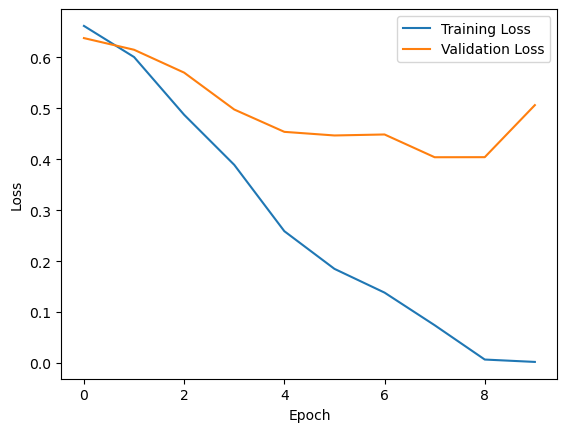

In [45]:
plt.plot(train_loss_list, label="Training Loss")
plt.plot(val_loss_list, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('loss.png')
plt.show()


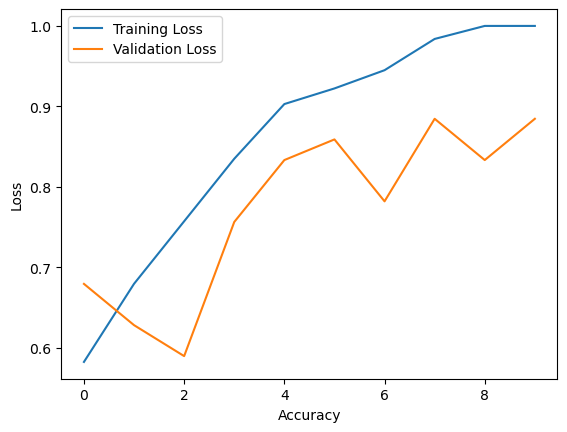

In [46]:
plt.plot(train_accuracy_list, label="Training Loss")
plt.plot(val_accuracy_list, label="Validation Loss")
plt.xlabel("Accuracy")
plt.ylabel("Loss")
plt.legend()
plt.savefig('accuracy.png')
plt.show()

In [65]:
model.load_state_dict(torch.load(model_save_path))
print(f"Model loaded successfully from {model_save_path}!")
model.eval()
with torch.no_grad():
        with tqdm(test_dataset_dataloader, unit="batch") as vepoch:
            for data, labels in vepoch:
                vepoch.set_description(f"Validation Epoch")
                data["input_values"] = data["input_values"][0]
                data["attention_mask"] = data["attention_mask"][0]

                data, labels = data.to(device), labels.to(device)

                # Forward pass
                outputs = model(input_values=data["input_values"], attention_mask=data["attention_mask"], labels=labels)
                loss = outputs.loss

                _, predicted = torch.max(outputs.logits, 1)
                val_accuracy_metric.add_batch(predictions=predicted, references=labels)

                vepoch.set_postfix(loss=loss.item())

val_accuracy = val_accuracy_metric.compute()
print(f"Validation Accuracy: {val_accuracy['accuracy'] * 100:.2f}%")

C:\Users\ngoth\AppData\Local\Temp\ipykernel_6800\256210211.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Model loaded successfully from ./trained models/mci model 85 acc.pth!


Validation Epoch: 100%|██████████| 30/30 [01:30<00:00,  3.02s/batch, loss=5.15]    

Validation Accuracy: 48.33%
